In [66]:
# Importating libraries

import numpy as np
from keras import models, losses, layers, metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import pandas as pd

In [46]:
#load dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter = ",")
dataset.shape

(768, 9)

In [50]:
#split data
X = dataset[:, :-1]
y = dataset[:, -1]
mean = X.mean(axis = 0)
std = X.std(axis = 0)
X = (X - mean)/std

1. Basic neural networks

In [51]:
np.random.seed(1)


# create model
model = models.Sequential()
model.add(layers.Dense(16, activation = "relu", input_dim = 8))
model.add(layers.Dense(16, activation = "exponential"))
model.add(layers.Dense(1, activation = "sigmoid"))

# compile model
model.compile(optimizer='rmsprop',loss=losses.BinaryCrossentropy(),metrics=[metrics.BinaryAccuracy()])

# fit model
hist = model.fit(X, y, validation_split = 0.33, epochs = 30, batch_size = 20)

Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - binary_accuracy: 0.6146 - loss: 1.2964 - val_binary_accuracy: 0.6732 - val_loss: 0.8531
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6393 - loss: 0.8791 - val_binary_accuracy: 0.6772 - val_loss: 0.6910
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.6359 - loss: 0.7269 - val_binary_accuracy: 0.6929 - val_loss: 0.6157
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6425 - loss: 0.6524 - val_binary_accuracy: 0.7165 - val_loss: 0.5709
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6801 - loss: 0.5891 - val_binary_accuracy: 0.7441 - val_loss: 0.5367
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7043 - loss: 0.5750 - val_binary_accuracy: 0.7402 - val_loss: 0.5093
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.7344 - loss: 0.5453 - val_binary_accuracy: 0.7559 - val_loss: 0.4901
Epoch 8/30
26/26 ━━━

Text(0.5, 1.0, 'Training and validation loss')

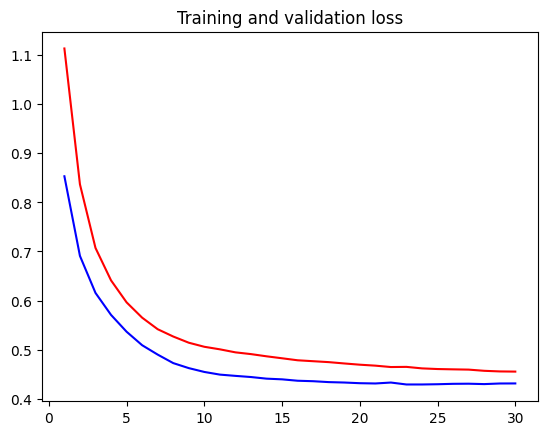

In [52]:
# plot loss and validation loss curves

loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
ep = range(1, len(loss) + 1)
plt.plot(ep, loss, "r-")
plt.plot(ep, val_loss, "b-")
plt.title("Training and validation loss")

2. Neural networks with K-Fold validation

In [101]:
df = pd.DataFrame()

In [108]:
# initialize parameters
params = {"N1" : 12, "N2" : 16, "N3" : 8, "act1" : "relu", "act2" : "exponential", "act3" : "relu", "opt" : "adam", "loss" : losses.BinaryCrossentropy(),
          "epochs" : 100, "batch_size" : 10}

def create_model(X, y) :
    """create and return model"""

    # create model
    model = models.Sequential()
    model.add(layers.Dense(params["N1"], activation = params["act1"], input_dim = 8))
    model.add(layers.Dense(params["N2"], activation = params["act2"]))
    model.add(layers.Dense(params["N3"], activation = params["act3"]))
    model.add(layers.Dense(1, activation = "sigmoid"))

    # compile model
    model.compile(optimizer=params["opt"],loss=params["loss"],metrics=["accuracy"])

    # fit model
    model.fit(X, y, validation_split = 0, epochs = params["epochs"], batch_size = params["batch_size"], verbose = 0)

    return model

In [109]:
# split data into 10 folds
kfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)

# list that will store the results
cv_score = []

for train_index, test_index in kfold.split(X, y) :
    # create model
    model = create_model(X[train_index], y[train_index])
    
    # evaluate the model
    score = model.evaluate(X[test_index], y[test_index], verbose = 0)
    print(model.metrics_names[1], score[1]*100)
    cv_score.append(score[1]*100)

c:\Users\natha\Documents\GitHub\4th year Polytech\Deep Learning\env_deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


compile_metrics 70.1298713684082
compile_metrics 74.02597665786743
compile_metrics 76.6233742237091
compile_metrics 67.53246784210205
compile_metrics 76.6233742237091
compile_metrics 75.32467246055603
compile_metrics 81.81818127632141
compile_metrics 77.92207598686218
compile_metrics 78.94737124443054
compile_metrics 69.73684430122375


In [110]:
params["accuracy"] = np.mean(cv_score)
df = pd.concat([df, pd.Series(params)], axis = 1)
print("average accuracy and standard deviation:", np.mean(cv_score), np.std(cv_score))
df

average accuracy and standard deviation: 74.86842095851898 4.288852434331156


,0,0,0
N1,16,32,12
N2,16,16,16
act1,relu,relu,relu
act2,exponential,exponential,exponential
opt,adam,adam,adam
loss,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...,<keras.src.losses.losses.BinaryCrossentropy ob...
epochs,100,100,100
batch_size,10,10,10
accuracy,74.606972,71.742994,74.868421
N3,NaN,NaN,8
